In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import StandardScaler
import random

In [2]:
sys.path.append('/home/BS94_SUR/phD/review/utils')
import anndata_loading_preprocessing
from anndata_loading_preprocessing import read_dscigm_datasets

In [3]:
path_folder = '/home/BS94_SUR/phD/review/datasets/cell clustering'
dataset_name = 'muraro'
col = True
column_name = None

In [4]:
adata = read_dscigm_datasets(path_folder, dataset_name, col, column_name)
adata.var = adata.var.reset_index(names=['genes'])
adata

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2126 × 2799
    obs: 'Unnamed: 0', 'Cell Type'
    var: 'genes'

In [5]:
genes_sums = np.array(adata.X.sum(axis=0)).flatten()
genes_names = adata.var['genes'].values
genes_df = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df = genes_df.sort_values(by="total_expr", ascending=False)
genes_df = genes_df.reset_index(drop=False)
genes_df.head(10)

index    gene   total_expr
0   1180   HSPA5  5057.625336
1   1801     PAM  4880.534831
2    615    CTSB  4427.169497
3   1221  IGFBP7  4082.838519
4   1857   PEG10  4056.732747
5   1863    PERP  3750.011703
6    801  ERO1LB  3731.377167
7   2191    SAT1  3694.082428
8    204  ATP1A1  3693.131388
9   2756    XBP1  3594.176386

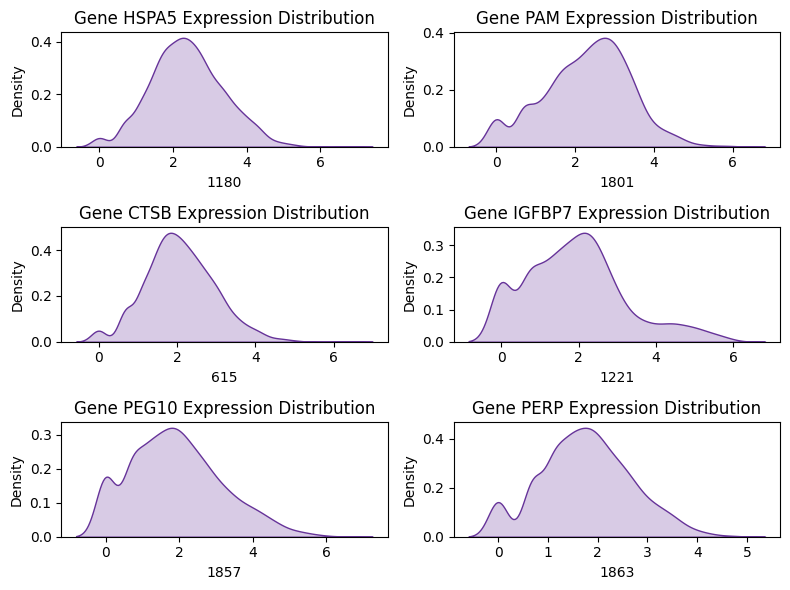

In [6]:
df = df = pd.DataFrame(adata.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[0.08443937 0.08914894 0.32159259 ... 0.17892357 0.06947917 0.30887365]


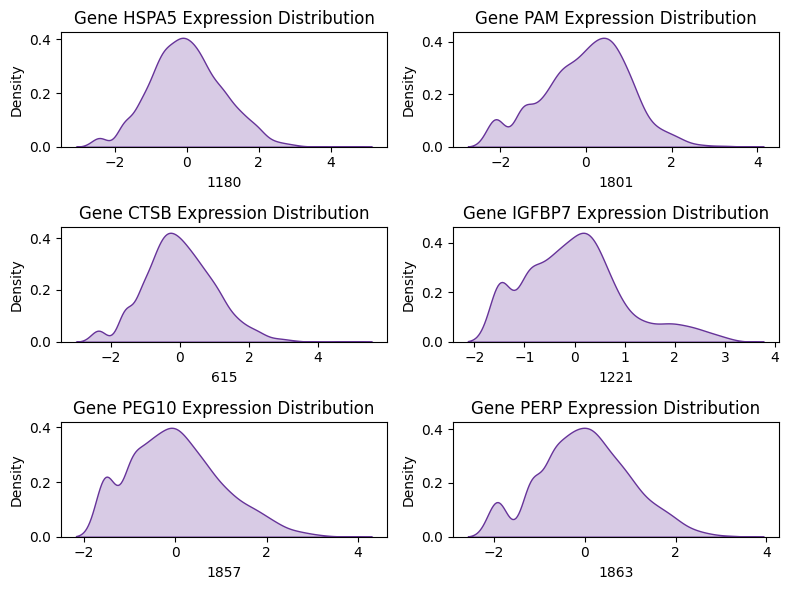

<Axes: ylabel='Count'>

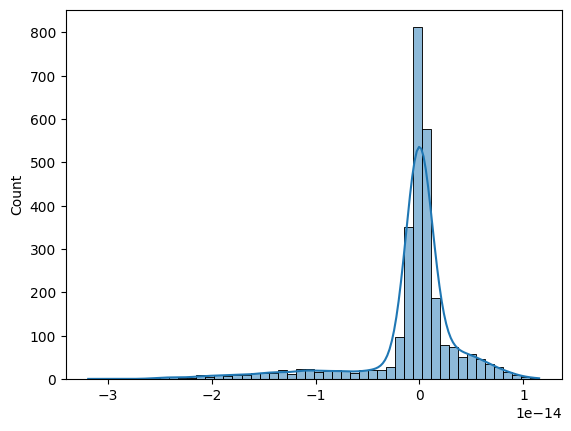

In [7]:
adata_std_1 = adata.copy()
scaler = StandardScaler()
scaler.fit(adata_std_1.X)
print(scaler.mean_)
adata_std_1.X = scaler.transform(adata_std_1.X)

df = pd.DataFrame(adata_std_1.X)

n_genes = 6
fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_1.X, axis=0), bins=50, kde=True)

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


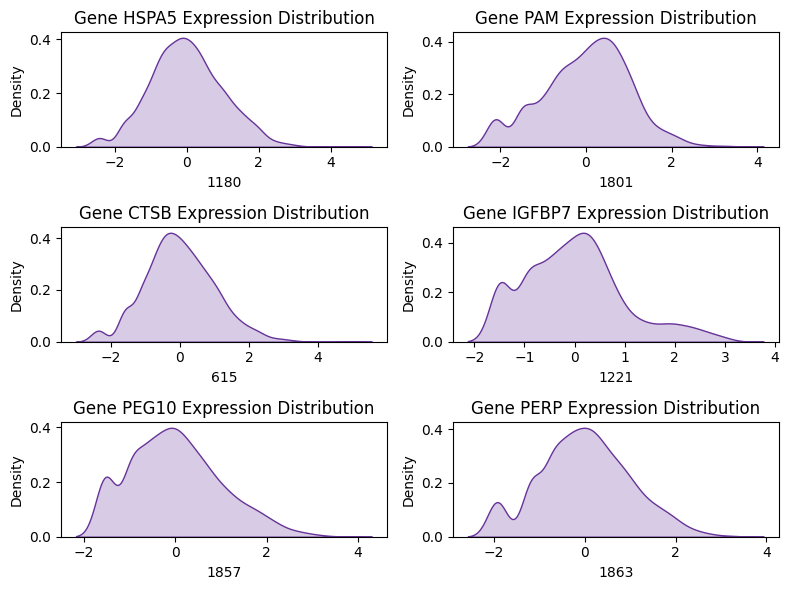

<Axes: ylabel='Count'>

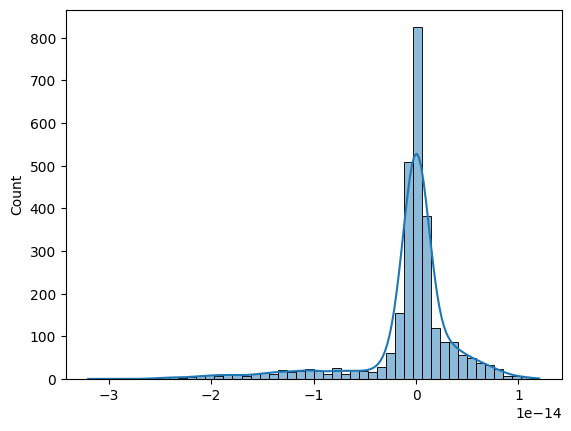

In [8]:
adata_std_2 = adata.copy()
adata_std_2 = sc.pp.scale(adata_std_2, zero_center=True, copy=True)

df = df = pd.DataFrame(adata_std_2.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_2.X, axis=0), bins=50, kde=True)

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


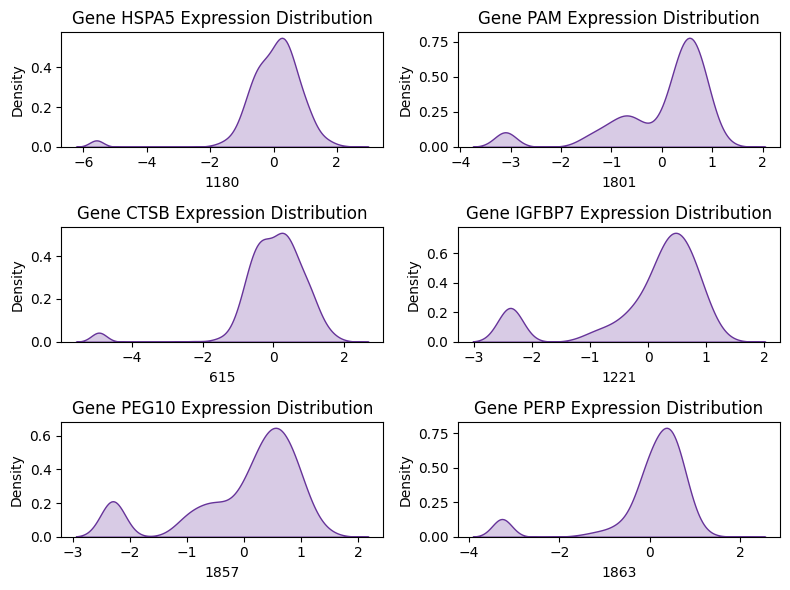

<Axes: ylabel='Count'>

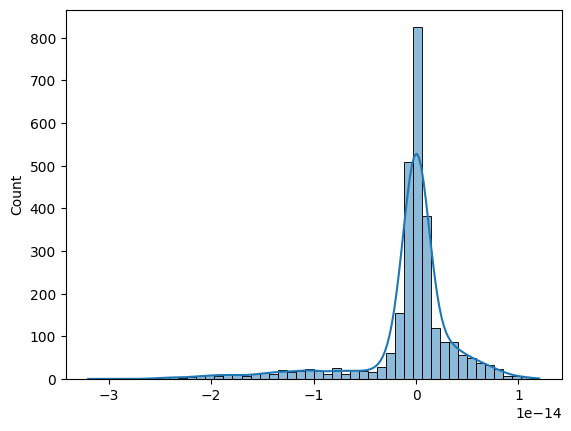

In [9]:
adata_std_2_ = adata.copy()
adata_std_2_ = sc.pp.normalize_total(adata_std_2_, target_sum=1e4, copy=True)
adata_std_2_ = sc.pp.log1p(adata_std_2_, copy=True)
adata_std_2_ = sc.pp.scale(adata_std_2_, zero_center=True, copy=True)

df = pd.DataFrame(adata_std_2_.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df.iloc[i]['index']
    gene = genes_df.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_2.X, axis=0), bins=50, kde=True)

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


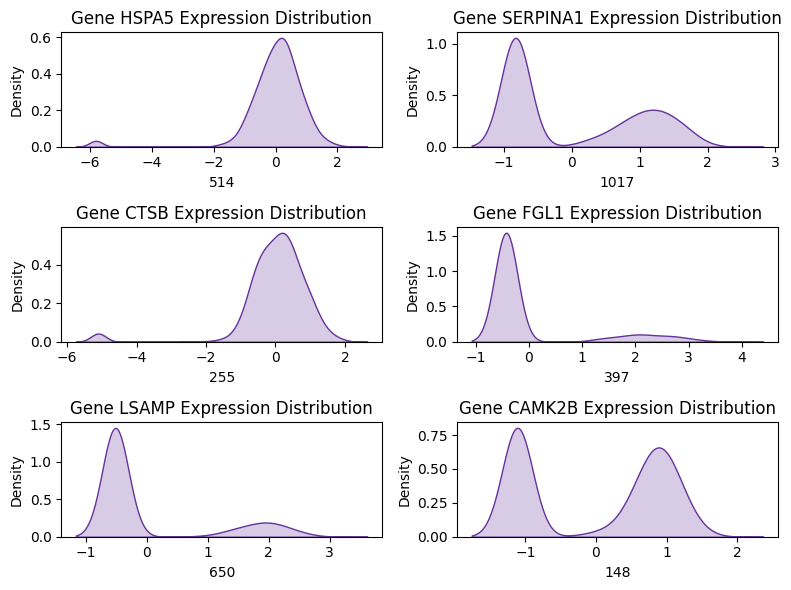

<Axes: ylabel='Count'>

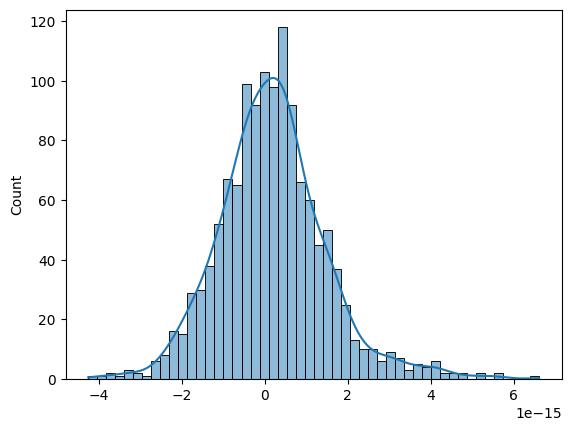

In [10]:
adata_std_3 = adata.copy()
adata_std_3 = sc.pp.filter_cells(adata_std_3, min_genes=25, copy=True)  
adata_std_3 = sc.pp.filter_genes(adata_std_3, min_cells=300, copy=True) 
sc.pp.highly_variable_genes(adata_std_3, flavor="seurat_v3", n_top_genes=None)
adata_std_3 = sc.pp.normalize_total(adata_std_3, target_sum=1e4, copy=True)
adata_std_3 = sc.pp.log1p(adata_std_3, copy=True)
adata_std_3 = sc.pp.scale(adata_std_3, zero_center=True, copy=True)

genes_sums = np.array(adata_std_3.X.sum(axis=0)).flatten()
genes_names = adata_std_3.var['genes'].values
genes_df_2 = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df_2 = genes_df_2.sort_values(by="total_expr", ascending=False)
genes_df_2 = genes_df_2.reset_index(drop=False)
genes_df_2.head(10)


df = df = pd.DataFrame(adata_std_3.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df_2.iloc[i]['index']
    gene = genes_df_2.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_3.X, axis=0), bins=50, kde=True)

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


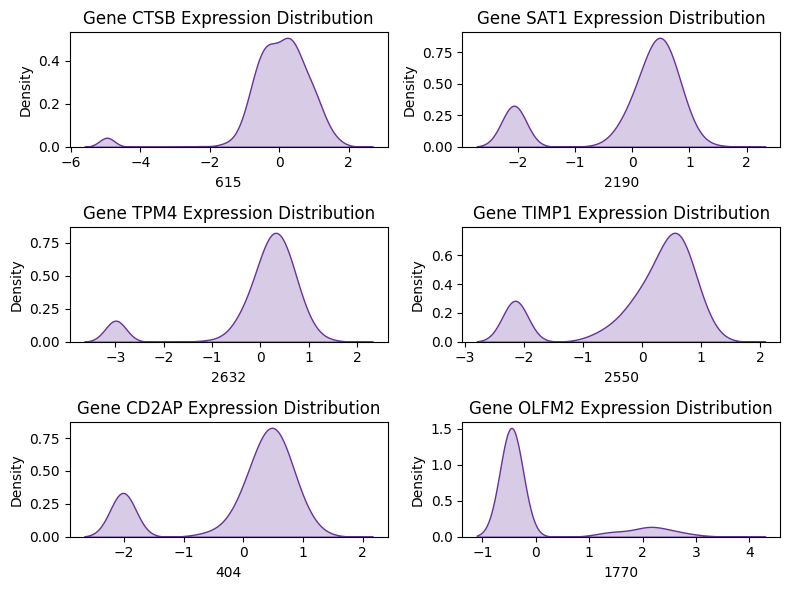

<Axes: ylabel='Count'>

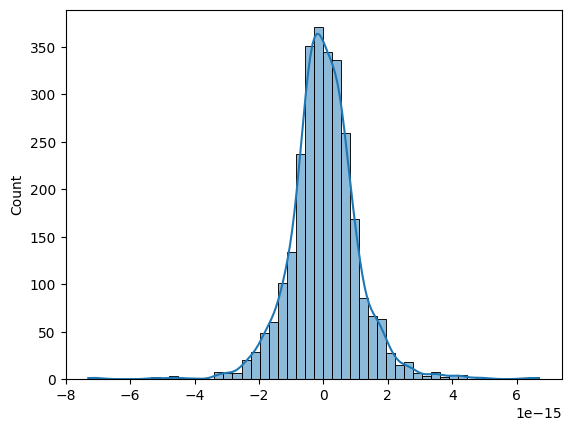

In [11]:
adata_std_4 = adata.copy()
adata_std_4 = sc.pp.filter_cells(adata_std_4, min_genes=200, copy=True)  
adata_std_4 = sc.pp.filter_genes(adata_std_4, min_cells=3, copy=True) 
sc.pp.highly_variable_genes(adata_std_4, flavor="seurat_v3", n_top_genes=None)
adata_std_4 = sc.pp.normalize_total(adata_std_4, target_sum=1e4, copy=True)
adata_std_4 = sc.pp.log1p(adata_std_4, copy=True)
adata_std_4 = sc.pp.scale(adata_std_4, zero_center=True, copy=True)

genes_sums = np.array(adata_std_4.X.sum(axis=0)).flatten()
genes_names = adata_std_4.var['genes'].values
genes_df_3 = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df_3 = genes_df_3.sort_values(by="total_expr", ascending=False)
genes_df_3 = genes_df_3.reset_index(drop=False)
genes_df_3.head(10)


df = pd.DataFrame(adata_std_4.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df_3.iloc[i]['index']
    gene = genes_df_3.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_4.X, axis=0), bins=50, kde=True)

/opt/conda/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


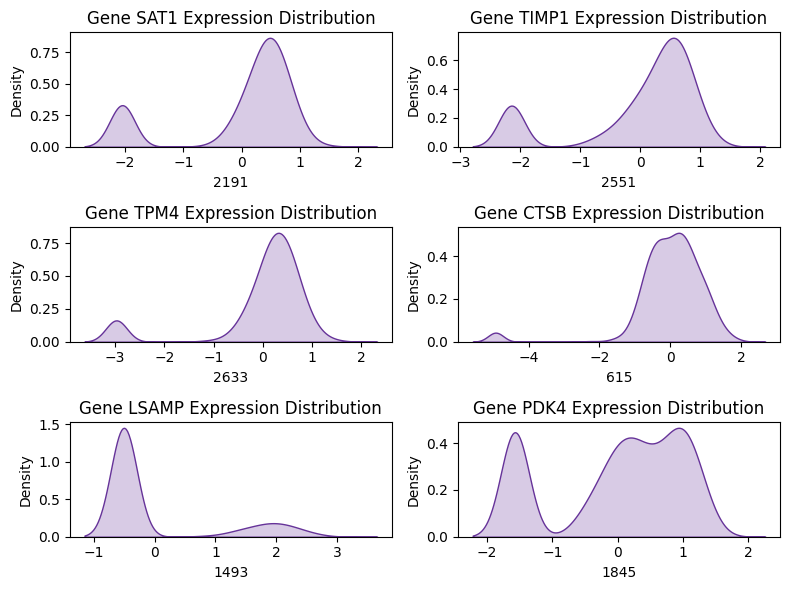

<Axes: ylabel='Count'>

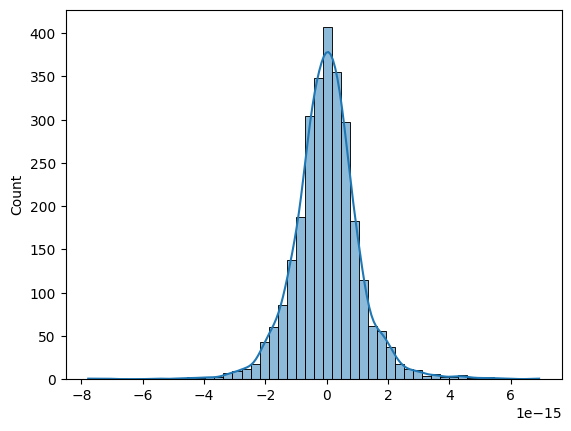

In [12]:
adata_std_5 = adata.copy()
#sc.pp.highly_variable_genes(adata_std_5, flavor="seurat_v3", n_top_genes=None)
adata_std_5 = sc.pp.normalize_total(adata_std_5, target_sum=1e4, copy=True)
adata_std_5 = sc.pp.log1p(adata_std_5, copy=True)
adata_std_5 = sc.pp.scale(adata_std_5, zero_center=True, copy=True)

genes_sums = np.array(adata_std_5.X.sum(axis=0)).flatten()
genes_names = adata_std_5.var['genes'].values
genes_df_4 = pd.DataFrame({'gene': genes_names, 'total_expr': genes_sums})
genes_df_4 = genes_df_4.sort_values(by="total_expr", ascending=False)
genes_df_4 = genes_df_4.reset_index(drop=False)
genes_df_4.head(10)


df = pd.DataFrame(adata_std_5.X)

n_genes = 6

fig, ax = plt.subplots(3, int(n_genes/3), figsize=(8, 6))
ax = ax.flatten()

for i in range(n_genes):
    idx = genes_df_4.iloc[i]['index']
    gene = genes_df_4.iloc[i]['gene']
    sns.kdeplot(df.iloc[:, idx], fill=True, color="rebeccapurple", ax=ax[i])
    ax[i].set_title(f"Gene {gene} Expression Distribution")

plt.tight_layout()
plt.show()

sns.histplot(np.mean(adata_std_5.X, axis=0), bins=50, kde=True)

In [13]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata

AnnData object with n_obs × n_vars = 2126 × 2799
    obs: 'Unnamed: 0', 'Cell Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'genes', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [14]:
adata.obs

Unnamed: 0    Cell Type  n_genes_by_counts  log1p_n_genes_by_counts  \
0              1        alpha                538                 6.289716   
1              2       ductal                914                 6.818924   
2              3        alpha                555                 6.320768   
3              4        alpha                424                 6.052089   
4              5  endothelial                856                 6.753438   
...          ...          ...                ...                      ...   
2121        2122       ductal                569                 6.345636   
2122        2123       acinar                967                 6.875232   
2123        2124  mesenchymal                955                 6.862758   
2124        2125        alpha                309                 5.736572   
2125        2126       ductal                902                 6.805723   

      total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
0       580.775610            6.366085                   21.061945   
1      1318.169338            7.184758                   13.725789   
2       648.993883            6.476963                   19.980875   
3       442.859023            6.095507                   24.458344   
4      1413.714899            7.254683                   14.098079   
...            ...                 ...                         ...   
2121    712.940320            6.570799                   20.231118   
2122   1457.256757            7.284997                   12.441827   
2123   1502.914632            7.315827                   13.238038   
2124    300.287967            5.708067                   30.508818   
2125   1232.686130            7.117762                   12.829655   

      pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
0                       35.715007                    56.869493   
1                       23.914658                    40.655644   
2                       34.102194                    55.758480   
3                       40.667992                    64.890817   
4                       25.155373                    43.295419   
...                           ...                          ...   
2121                    34.569766                    56.375227   
2122                    22.068715                    38.232483   
2123                    23.254260                    39.625616   
2124                    49.519818                    74.804280   
2125                    23.143721                    39.857019   

      pct_counts_in_top_500_genes  
0                       95.458352  
1                       74.616934  
2                       94.117522  
3                      100.000000  
4                       79.352988  
...                           ...  
2121                    93.282091  
2122                    73.006548  
2123                    73.577839  
2124                   100.000000  
2125                    74.027795  

[2126 rows x 10 columns]

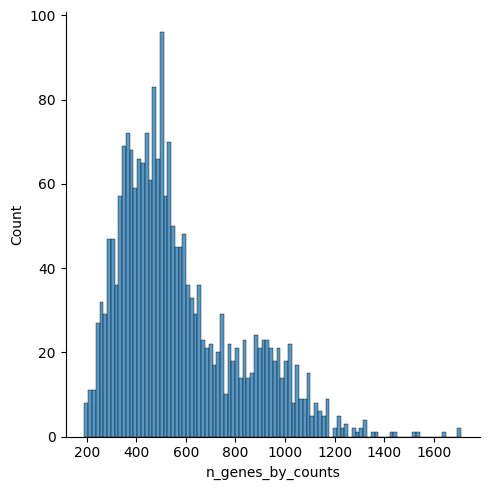

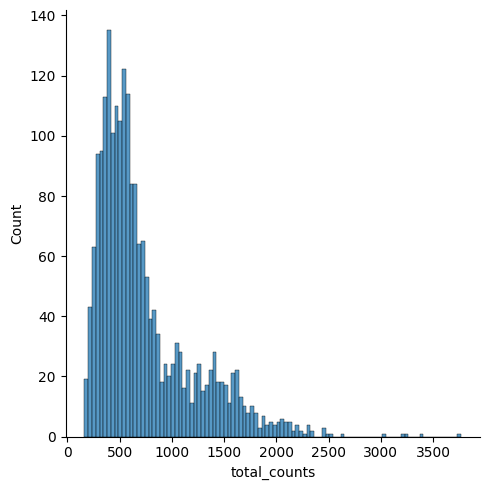

In [15]:
sns.displot(adata.obs["n_genes_by_counts"], bins=100, kde=False)
sns.displot(adata.obs["total_counts"], bins=100, kde=False)

In [16]:
adata.var

genes  n_cells_by_counts  mean_counts  log1p_mean_counts  \
0         A2M                120     0.084439           0.081063   
1       AADAC                147     0.089149           0.085397   
2       ABCA1                623     0.321593           0.278838   
3       ABCB1                733     0.395136           0.332992   
4       ABCB5                176     0.061217           0.059417   
...       ...                ...          ...                ...   
2794  ZSCAN31                238     0.092971           0.088900   
2795   ZSWIM6                914     0.426822           0.355450   
2796   ZWILCH                442     0.178924           0.164602   
2797    ZWINT                167     0.069479           0.067172   
2798      ZYX                613     0.308874           0.269167   

      pct_dropout_by_counts  total_counts  log1p_total_counts  
0                 94.355597    179.518096            5.195831  
1                 93.085607    189.530650            5.249813  
2                 70.696143    683.705840            6.528989  
3                 65.522107    840.059340            6.734662  
4                 91.721543    130.148356            4.876329  
...                     ...           ...                 ...  
2794              88.805268    197.656179            5.291576  
2795              57.008467    907.424279            6.811712  
2796              79.209784    380.391514            5.943826  
2797              92.144873    147.712706            5.002016  
2798              71.166510    656.665381            6.488696  

[2799 rows x 7 columns]